# Feature importance for California Housing dataset

This notebook provides usage of `rfflearn.explainer` module.

In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

# Import rfflearn.
import rfflearn.cpu as rfflearn

# If you want to enable GPU, please import rfflearn like the following instead.
#import rfflearn.gpu as rfflearn

## Prepare dataset

Load California housing dataset.

In [2]:
# Load California Housing data from sklearn.
data = sklearn.datasets.fetch_california_housing()

# Split data to train and test.
Xs_train, Xs_test, ys_train, ys_test = sklearn.model_selection.train_test_split(data["data"], data["target"], test_size=0.2, random_state=111)

# Data standardization.
scaler   = sklearn.preprocessing.StandardScaler().fit(Xs_train)
Xs_train = scaler.transform(Xs_train)
Xs_test  = scaler.transform(Xs_test)

## Instanciate a regressor model

In [3]:
# RFF Gaussian processing regressor.
model = rfflearn.RFFGPR(dim_kernel=128, std_kernel=0.05, std_error=0.1)

# RFF regressor.
# model = rfflearn.RFFRegressor(dim_kernel=128, std_kernel=0.05)

## Train the model

In [4]:
# Fix seed for random fourier feature calclation
rfflearn.seed(111)

# Train the model.
model.fit(Xs_train, ys_train)

# Conduct prediction for the test data
pred_test = model.predict(Xs_test)
score_r2  = sklearn.metrics.r2_score(ys_test, pred_test)
print("- R2 score of the model: ", score_r2)

- R2 score of the model:  0.6813701429595467


## Compute feature importance

In [5]:
# Calculate feature importance (SHAP and permutation importance).
shap_values = rfflearn.shap_feature_importance(model, Xs_test)
perm_values = rfflearn.permutation_feature_importance(model, Xs_test, ys_test)

  0%|          | 0/4128 [00:00<?, ?it/s]

## Plot results

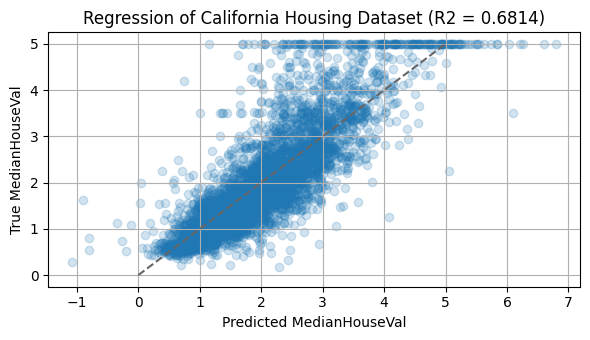

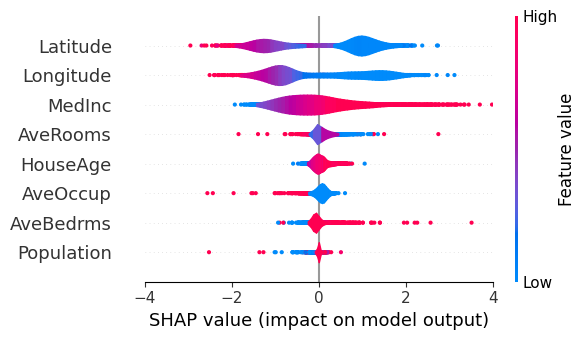

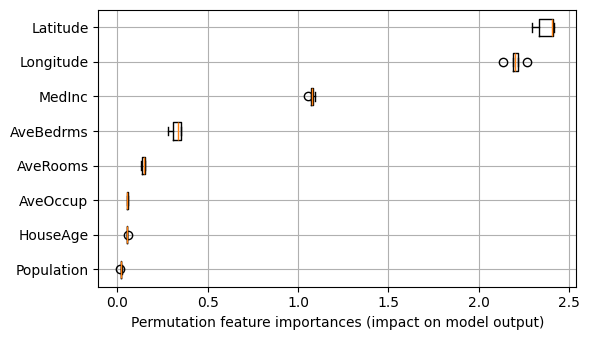

In [6]:
# Draw regression result.
plt.figure(figsize=(6, 3.5))
plt.scatter(pred_test, ys_test, alpha=0.2)
plt.plot([0, 5], [0, 5], "--", color="#666666")
plt.title("Regression of California Housing Dataset (R2 = %.4f)" % score_r2)
plt.xlabel("Predicted MedianHouseVal")
plt.ylabel("True MedianHouseVal")
plt.grid()
plt.tight_layout()

# Visualize SHAP importance.
plt.figure(figsize=(6, 3.5))
rfflearn.shap_plot(shap_values, Xs_test, data.feature_names, plot_size=(6, 3.5), show=False)
plt.xlim(-4, 4)
plt.tight_layout()

# Visualize permurtation importance.
plt.figure(figsize=(6, 3.5))
rfflearn.permutation_plot(perm_values, data.feature_names, show=False)
plt.tight_layout()

# Show all figures.
plt.show()